In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Test one weather file
test_weather = pd.read_csv('/content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2020.csv', nrows=5)
print("Weather columns:", test_weather.columns.tolist())
print("Sample weather data:")
print(test_weather.head())

# Test crime file
test_crime = pd.read_csv('/content/drive/MyDrive/Temperature_Crime_Analysis/ODC_CRIME_OFFENSES_P_-3254178225590307312.csv', nrows=5)
print("Crime columns:", test_crime.columns.tolist())
print("Sample crime data:")
print(test_crime.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Weather columns: ['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'REPORT_TYPE', 'SOURCE', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPresentWeatherType', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySkyConditions', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindGustSpeed', 'HourlyWindSpeed', 'Sunrise', 'Sunset', 'DailyAverageDewPointTemperature', 'DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity', 'DailyAverageSeaLevelPressure', 'DailyAverageStationPressure', 'DailyAverageWetBulbTemperature', 'DailyAverageWindSpeed', 'DailyCoolingDegreeDays', 'DailyDepartureFromNormalAverageTemperature', 'DailyHeatingDegreeDays', 'DailyMaximumDryBulbTemp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
TEMPERATURE AND VIOLENT CRIME ANALYSIS
Processing /content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2020.csv
  - Records with max temp data: 366
Processing /content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2021.csv
  - Records with max temp data: 365
Processing /content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2022.csv
  - Records with max temp data: 363
Processing /content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2023.csv
  - Records with max temp data: 363
Processing /content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2024.csv
  - Records with max temp data: 366

Total weather records after processing: 1823
Date range: 2020-01-01 to 2024-12-31
Processing crime data from /content/drive/MyDrive/Temperature_Crime_Analysis/ODC_CRIME_OFFENSES_P_-3254178225590307312.csv
Total crime reco

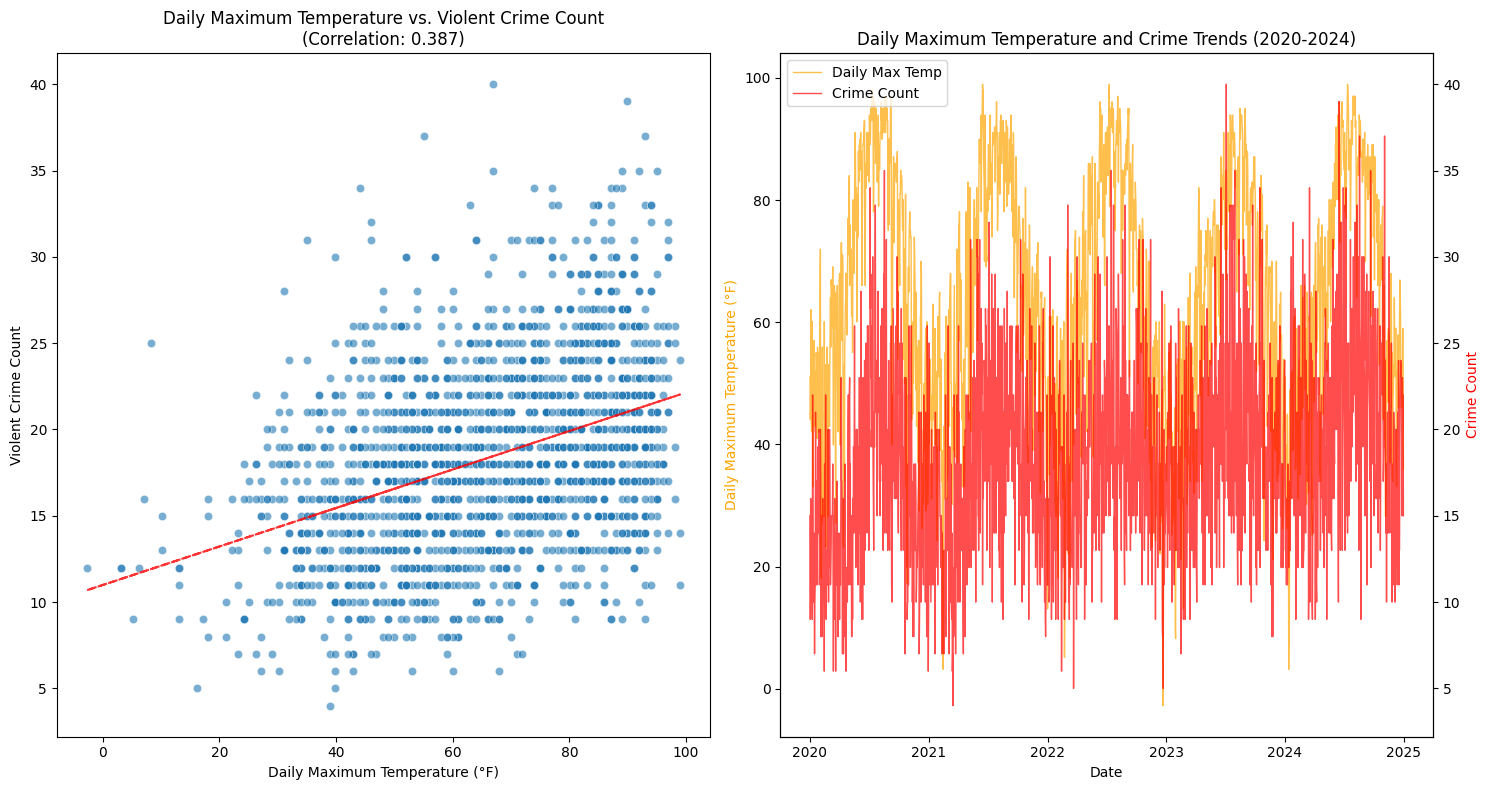


ADDITIONAL ANALYSIS

1. MONTHLY ANALYSIS:
       Avg_Daily_Max_Temp_F  Avg_Crimes_Per_Day
MONTH                                          
1                     44.36               16.13
2                     44.02               15.13
3                     52.08               15.67
4                     60.84               16.21
5                     69.66               18.83
6                     82.70               20.41
7                     88.24               21.66
8                     87.56               20.85
9                     80.93               20.15
10                    67.64               19.93
11                    55.01               17.29
12                    49.23               16.73

2. SEASONAL ANALYSIS:
        Avg_Daily_Max_Temp_F  Avg_Crimes_Per_Day
SEASON                                          
Fall                   67.85               19.13
Spring                 60.86               16.91
Summer                 86.21               20.98
Winter           

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

def process_weather_data(file_paths):
    """
    Process weather data from multiple CSV files
    """
    all_weather_data = []

    for file_path in file_paths:
        print(f"Processing {file_path}")

        # Read only necessary columns to save memory
        df = pd.read_csv(file_path, usecols=['DATE', 'DailyMaximumDryBulbTemperature'])

        # Convert dates to datetime and extract date portion
        df['DATE'] = pd.to_datetime(df['DATE'])
        df['DATE'] = df['DATE'].dt.date

        # Keep only rows with non-null temperature readings
        df = df.dropna(subset=['DailyMaximumDryBulbTemperature'])

        # Convert Celsius to Fahrenheit
        df['DailyMaximumDryBulbTemperature'] = (df['DailyMaximumDryBulbTemperature'] * 9/5) + 32

        print(f"  - Records with max temp data: {len(df)}")

        all_weather_data.append(df)

    # Combine all years
    weather_df = pd.concat(all_weather_data, ignore_index=True)

    # Make sure I have exactly one record per day (remove any duplicates)
    weather_df = weather_df.drop_duplicates(subset=['DATE'])

    print(f"\nTotal weather records after processing: {len(weather_df)}")
    print(f"Date range: {weather_df['DATE'].min()} to {weather_df['DATE'].max()}")

    return weather_df

def process_crime_data(crime_file_path):
    """
    Process crime data to get daily violent crime counts
    """
    print(f"Processing crime data from {crime_file_path}")

    # Read only necessary columns
    crime_df = pd.read_csv(crime_file_path, usecols=['REPORTED_DATE', 'OFFENSE_CATEGORY_ID'])

    print(f"Total crime records: {len(crime_df)}")

    # Convert dates to datetime and extract date portion
    crime_df['DATE'] = pd.to_datetime(crime_df['REPORTED_DATE'], format='%m/%d/%Y %I:%M:%S %p')
    crime_df['DATE'] = crime_df['DATE'].dt.date

    # Filter for violent crimes
    violent_crime_categories = [
        'other-crimes-against-persons',
        'aggravated-assault',
        'robbery',
        'murder'
    ]

    violent_crimes_df = crime_df[crime_df['OFFENSE_CATEGORY_ID'].isin(violent_crime_categories)]

    print(f"Violent crime records: {len(violent_crimes_df)}")
    print(f"Violent crime categories found:")
    for category in violent_crime_categories:
        count = len(violent_crimes_df[violent_crimes_df['OFFENSE_CATEGORY_ID'] == category])
        print(f"  - {category}: {count}")

    # Count violent crimes per day
    daily_crime_counts = violent_crimes_df.groupby('DATE').size().reset_index(name='VIOLENT_CRIME_COUNT')

    print(f"Days with violent crimes: {len(daily_crime_counts)}")
    print(f"Crime date range: {daily_crime_counts['DATE'].min()} to {daily_crime_counts['DATE'].max()}")

    return daily_crime_counts

def analyze_temp_crime_relationship(weather_df, crime_df):
    """
    Join datasets and analyze the relationship between temperature and violent crime
    """
    print("\nAnalyzing temperature-crime relationship...")

    # Merge datasets on date
    merged_df = pd.merge(weather_df, crime_df, on='DATE', how='inner')

    print(f"Merged dataset size: {len(merged_df)} days")
    print(f"Date range of merged data: {merged_df['DATE'].min()} to {merged_df['DATE'].max()}")

    # Calculate correlation
    correlation = merged_df['DailyMaximumDryBulbTemperature'].corr(merged_df['VIOLENT_CRIME_COUNT'])
    print(f"\nCorrelation between daily maximum temperature and violent crime count: {correlation:.4f}")

    # Basic statistics
    print(f"\nDaily Maximum Temperature Statistics:")
    print(f"  - Mean of daily maximums: {merged_df['DailyMaximumDryBulbTemperature'].mean():.1f}°F")
    print(f"  - Lowest daily maximum: {merged_df['DailyMaximumDryBulbTemperature'].min():.1f}°F")
    print(f"  - Highest daily maximum: {merged_df['DailyMaximumDryBulbTemperature'].max():.1f}°F")

    print(f"\nViolent Crime Statistics:")
    print(f"  - Mean per day: {merged_df['VIOLENT_CRIME_COUNT'].mean():.1f}")
    print(f"  - Min per day: {merged_df['VIOLENT_CRIME_COUNT'].min()}")
    print(f"  - Max per day: {merged_df['VIOLENT_CRIME_COUNT'].max()}")

    # Create visualizations
    plt.figure(figsize=(15, 8))

    # Scatterplot
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=merged_df, x='DailyMaximumDryBulbTemperature', y='VIOLENT_CRIME_COUNT', alpha=0.6)
    plt.title(f'Daily Maximum Temperature vs. Violent Crime Count\n(Correlation: {correlation:.3f})')
    plt.xlabel('Daily Maximum Temperature (°F)')
    plt.ylabel('Violent Crime Count')

    # Add trend line
    z = np.polyfit(merged_df['DailyMaximumDryBulbTemperature'], merged_df['VIOLENT_CRIME_COUNT'], 1)
    p = np.poly1d(z)
    plt.plot(merged_df['DailyMaximumDryBulbTemperature'], p(merged_df['DailyMaximumDryBulbTemperature']), "r--", alpha=0.8)

    # Time series (full 5 years of data)
    plt.subplot(1, 2, 2)
    full_df = merged_df.sort_values('DATE').copy()
    full_df['DATE'] = pd.to_datetime(full_df['DATE'])

    ax1 = plt.gca()
    ax2 = ax1.twinx()

    line1 = ax1.plot(full_df['DATE'], full_df['DailyMaximumDryBulbTemperature'], 'orange', label='Daily Max Temp', linewidth=1, alpha=0.7)
    line2 = ax2.plot(full_df['DATE'], full_df['VIOLENT_CRIME_COUNT'], 'red', label='Crime Count', linewidth=1, alpha=0.7)

    ax1.set_ylabel('Daily Maximum Temperature (°F)', color='orange')
    ax2.set_ylabel('Crime Count', color='red')
    ax1.set_xlabel('Date')

    # Combine legends
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')

    plt.title('Daily Maximum Temperature and Crime Trends (2020-2024)')
    plt.xticks(rotation=45)

    plt.tight_layout()

    # Save the visualization as high-resolution PNG to Google Drive
    viz_file = '/content/drive/MyDrive/Temperature_Crime_Analysis/temperature_crime_visualization.png'
    plt.savefig(viz_file, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"\nVisualization saved to: {viz_file}")

    plt.show()

    return merged_df

def create_sonification_csv(merged_df):
    """
    Create a clean CSV file for data sonification with date, max temp, and crime count
    """
    # Create sonification dataframe with only the three needed columns
    sonification_df = merged_df[['DATE', 'DailyMaximumDryBulbTemperature', 'VIOLENT_CRIME_COUNT']].copy()

    # Rename columns for clarity in sonification work
    sonification_df.columns = ['date', 'max_temp_f', 'crime_count']

    # Sort by date to ensure chronological order
    sonification_df = sonification_df.sort_values('date').reset_index(drop=True)

    # Convert date to string format for easier handling in sonification tools
    sonification_df['date'] = sonification_df['date'].astype(str)

    print(f"Sonification dataset created:")
    print(f"  - Total days: {len(sonification_df)}")
    print(f"  - Date range: {sonification_df['date'].min()} to {sonification_df['date'].max()}")
    print(f"  - Temperature range: {sonification_df['max_temp_f'].min():.1f}°F to {sonification_df['max_temp_f'].max():.1f}°F")
    print(f"  - Crime count range: {sonification_df['crime_count'].min()} to {sonification_df['crime_count'].max()}")

    # Save the sonification CSV
    sonification_file = '/content/drive/MyDrive/Temperature_Crime_Analysis/sonification_data.csv'
    sonification_df.to_csv(sonification_file, index=False)

    # Show sample of the data
    print(f"\nSample of sonification data:")
    print(sonification_df.head(10))

    return sonification_df

def additional_analysis(merged_df):
    """
    Perform additional analysis on the merged dataset
    """
    print("\n" + "="*50)
    print("ADDITIONAL ANALYSIS")
    print("="*50)

    # Add date components for analysis
    merged_df = merged_df.copy()
    merged_df['DATE_DT'] = pd.to_datetime(merged_df['DATE'])
    merged_df['MONTH'] = merged_df['DATE_DT'].dt.month
    merged_df['DAY_OF_WEEK'] = merged_df['DATE_DT'].dt.day_name()
    merged_df['SEASON'] = merged_df['MONTH'].map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    })

    # Monthly averages
    print("\n1. MONTHLY ANALYSIS:")
    monthly_avg = merged_df.groupby('MONTH').agg({
        'DailyMaximumDryBulbTemperature': 'mean',
        'VIOLENT_CRIME_COUNT': 'mean'
    }).round(2)
    monthly_avg.columns = ['Avg_Daily_Max_Temp_F', 'Avg_Crimes_Per_Day']
    print(monthly_avg)

    # Seasonal analysis
    print("\n2. SEASONAL ANALYSIS:")
    seasonal_avg = merged_df.groupby('SEASON').agg({
        'DailyMaximumDryBulbTemperature': 'mean',
        'VIOLENT_CRIME_COUNT': 'mean'
    }).round(2)
    seasonal_avg.columns = ['Avg_Daily_Max_Temp_F', 'Avg_Crimes_Per_Day']
    print(seasonal_avg)

    # Day of week analysis
    print("\n3. DAY OF WEEK ANALYSIS:")
    dow_avg = merged_df.groupby('DAY_OF_WEEK').agg({
        'VIOLENT_CRIME_COUNT': 'mean'
    }).round(2)
    dow_avg.columns = ['Avg_Crimes_Per_Day']
    # Reorder days of week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_avg = dow_avg.reindex(day_order)
    print(dow_avg)

    # Temperature bins analysis
    print("\n4. TEMPERATURE BINS ANALYSIS:")
    merged_df['TEMP_BIN'] = pd.cut(merged_df['DailyMaximumDryBulbTemperature'],
                                   bins=5, labels=['Very Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])
    temp_bin_avg = merged_df.groupby('TEMP_BIN', observed=True).agg({
        'VIOLENT_CRIME_COUNT': ['mean', 'count']
    }).round(2)
    temp_bin_avg.columns = ['Avg_Crimes_Per_Day', 'Days_Count']
    print(temp_bin_avg)

    return merged_df

def main():
    """
    Main execution function
    """
    print("TEMPERATURE AND VIOLENT CRIME ANALYSIS")
    print("="*50)

    # File paths
    weather_files = [
        '/content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2020.csv',
        '/content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2021.csv',
        '/content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2022.csv',
        '/content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2023.csv',
        '/content/drive/MyDrive/Temperature_Crime_Analysis/LCD_USW00093067_2024.csv'
    ]

    crime_file = '/content/drive/MyDrive/Temperature_Crime_Analysis/ODC_CRIME_OFFENSES_P_-3254178225590307312.csv'

    try:
        # Process data
        weather_data = process_weather_data(weather_files)

        crime_data = process_crime_data(crime_file)

        merged_data = analyze_temp_crime_relationship(weather_data, crime_data)

        final_data = additional_analysis(merged_data)

        sonification_data = create_sonification_csv(final_data)

        # Save processed data
        output_file = '/content/drive/MyDrive/Temperature_Crime_Analysis/temperature_crime_analysis_results.csv'
        final_data.to_csv(output_file, index=False)


        return final_data, sonification_data

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        raise

# Run the analysis
if __name__ == "__main__":
    results, sonification_csv = main()